In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
import re
from fbprophet import Prophet

In [2]:
key = '*'
symbol = 'AMD'
interval = '1min'

In [3]:
# api_call = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&outputsize=full&apikey={key}'
api_call = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={key}'

In [4]:
req = requests.get(api_call)

In [5]:
amd_ts = json.loads(req.text)

In [6]:
meta = amd_ts['Meta Data']

In [7]:
data = amd_ts['Time Series (Daily)']

In [8]:
meta

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AMD',
 '3. Last Refreshed': '2020-01-24',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [9]:
amd_df = pd.DataFrame(data).T

In [10]:
amd_df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [11]:
col_name = {'1. open': 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'Close', '5. volume': 'Volume', 'index': 'Time'}
amd_df = amd_df.reset_index()
amd_df = amd_df.rename(columns=col_name)

In [12]:
amd_df.tail()

,Time,Open,High,Low,Close,Volume
5028,2000-01-28,37.1900,37.7500,34.3800,35.2500,3433600
5029,2000-01-27,38.0000,39.0000,36.8800,36.9400,3083900
5030,2000-01-26,37.6300,38.2500,36.5600,37.0000,3798900
5031,2000-01-25,34.5600,40.5000,34.5000,40.0000,5402900
5032,2000-01-24,37.2500,38.4400,33.8100,34.5000,5134900


In [13]:
amd_open = amd_df[['Time', 'Open']]
amd_open = amd_open.rename(columns={'Time':'ds', 'Open': 'y'})
m = Prophet()
m.fit(amd_open)
future = m.make_future_dataframe(periods=420)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\silas\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [14]:
forecast = m.predict(future)

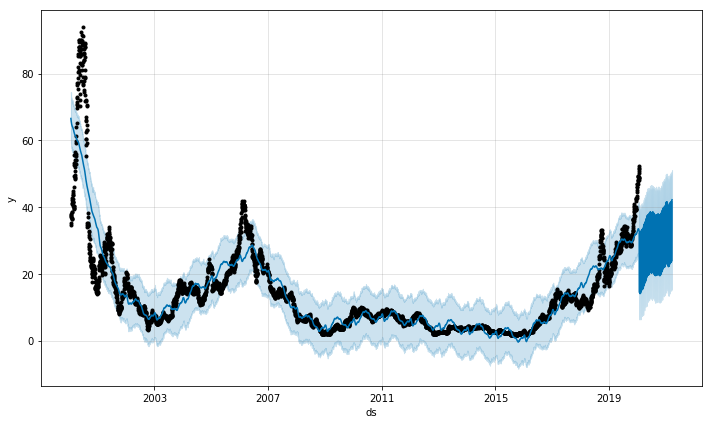

In [15]:
fig1 = m.plot(forecast)

In [16]:
amd_df.to_csv('amd_daily_data.csv')